# **Práctica 2: Operaciones básicas con imágenes**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

EXPORTAR LA IMAGEN EN FORMATO VECTORIAL

# Lectura y visualización de imágenes

Una imagen se forma al convertir la luz captada por un sensor en un conjunto de valores de intensidad luminosa, con un valor asignado a cada celda. Cada unidad individual en la imagen se conoce como píxel (elemento de imagen).

Las imágenes adquiridas por un sensor se guardan en un archivo en el disco en una variedad de formatos posibles. Los formatos más frecuentes son PNG, que emplea compresión sin pérdida (lossless compression) y resulta óptimo para el procesamiento de imágenes, y JPG, un formato que utiliza compresión con pérdida (lossy compression) y suele ser preferido en la fotografía digital.

El formato de este tipo de ficheros es complejo y, por tanto, es necesario utilizar bibliotecas para su lectura. Entre las bibliotecas más utilizadas para este propósito, destacan OpenCV, Scikit-Image (SKImage) y Python Imaging Library (PIL). Estas herramientas proveen una amplia gama de funciones y utilidades que facilitan la gestión de estos formatos de archivo, permitiendo a los desarrolladores acceder y trabajar con imágenes de manera eficiente.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import cv2

A continuación se muestran algunos ejemplos de como leer y visualizar imágenes

En primer lugar se descarga la imagen asumiendo que se dispone del programa `curl`.

In [3]:
!curl www.atc.uniovi.es/grado/3va/prac/pez.jpg --output pez.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 82974  100 82974    0     0   593k      0 --:--:-- --:--:-- --:--:--  609k


A continuación se utilizará OpenCV para leer la imagen.

[OpenCV](https://opencv.org/), que significa "Open Source Computer Vision Library" (Biblioteca de Visión por Computador de Código Abierto), es una biblioteca de software de código abierto ampliamente utilizada en el campo de la visión por computador y el procesamiento de imágenes. Fue desarrollada originalmente por Intel y ahora es gestionada por una comunidad de código abierto. OpenCV proporciona un conjunto de herramientas y algoritmos que permiten a los desarrolladores realizar una amplia variedad de tareas relacionadas con la visión por computador, como la detección de objetos, el seguimiento de objetos, el reconocimiento de patrones, la calibración de cámaras y la manipulación de imágenes.

Una de las funcionalidades de OpenCV es la lectura de imágenes en diversos formatos.

In [31]:
#SOLO LA IMAGEN, SIN RGB
#CARGAR IMAGEN NORMAL
img = cv2.imread('pez.jpg')
print(f"Type: {type(img)}")
print(f"Shape: {img.shape}")
print(f"Dim: {img.ndim}")
num_rows, num_cols, num_colors = img.shape
print(f"Rows: {num_rows}")
print(f"Columns: {num_cols}")
print(f"Colors: {num_cols}")
print(f"DataType: {img.dtype}")

Type: <class 'numpy.ndarray'>
Shape: (684, 1024, 3)
Dim: 3
Rows: 684
Columns: 1024
Colors: 1024
DataType: uint8


Como se puede observar, el resultado de la lectura de la imagen retorna un array de NumPy. El array tiene tres dimensiones, siendo la tercera dimensión utilizada para el color. Cada color se representa mediante una matriz.

Para visualizar la imagen se puede usar Matplotlib. Sin embargo es importante saber que, por defecto, OpenCV establece el orden de los canales de color como BGR (debido a razones históricas) y `matplotlib` espera recibir la imagen en formato RGB. Por tanto, para visualizar una imagen leída con OpenCV es necesario trasponer los canales.

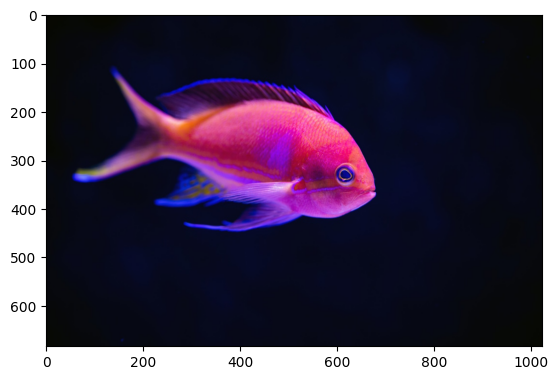

In [32]:
#SOLO RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

La conversión de formatos se puede realizar usando OpenCV o directamente con las matrices de NumPy.

In [33]:

img_rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb2 = img[:, :, ::-1]#PASAR A RGB DE OTRA MANERA
np.array_equal(img_rgb1, img_rgb2)

True

Matplotlib permite visualizar imágenes en color o en escala de grises. Si se le pasa a la función una matriz, matplotlib asume que se trata de una imagen en escala de grises y configura la visualización para ajustarse al mínimo y máximo de la matriz

(0, 255)
(0, 223)
(0, 255)


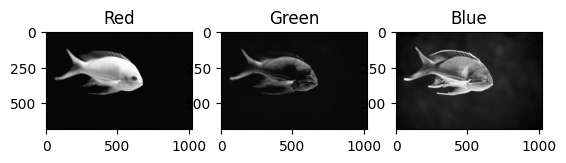

In [39]:
plt.subplot(1,3,1)
plt.imshow(img_rgb[:,:,0], cmap='gray')
plt.title('Red')
print(plt.gci().get_clim())

plt.subplot(1,3,2)
plt.imshow(img_rgb[:,:,1], cmap='gray')
plt.title('Green')

print(plt.gci().get_clim())

plt.subplot(1,3,3)
plt.imshow(img_rgb[:,:,2], cmap='gray')
plt.title('Blue')
print(plt.gci().get_clim())
plt.show()

(0, 255)


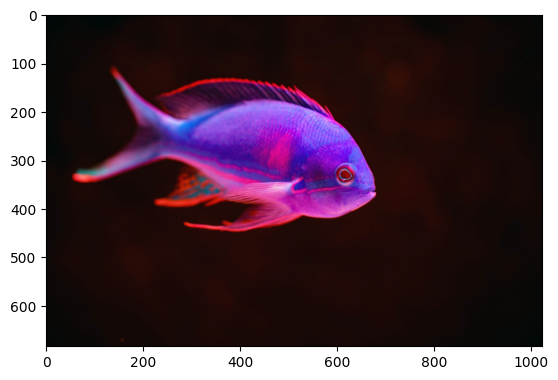

In [49]:
#SABER LOS PIXELES DE LA INTENSIDAD DE LA IMAGEN

plt.imshow(img)
print(plt.gci().get_clim())
plt.show()


Cuanto más claro, más intensidad tiene.

En muchos casos, se convierten las imágenes a formato de número real para realizar diversas operaciones.

Type: float32


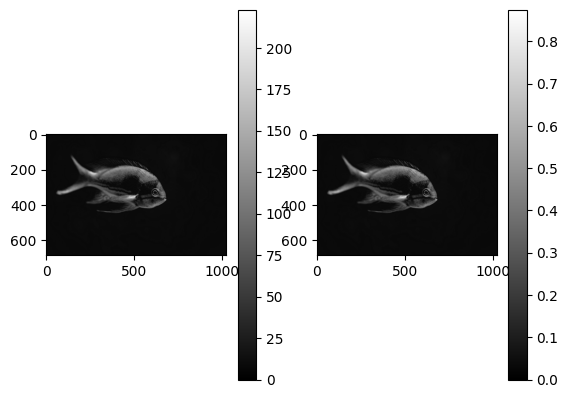

In [36]:
img_green = img_rgb[:,:,1]
img_green_float = img_green.astype(np.float32) / 255
print(f"Type: {img_green_float.dtype}")

plt.subplot(1,2,1)
plt.imshow(img_green, cmap='gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(img_green_float, cmap='gray')
plt.colorbar()
plt.show()


Visualization limits: (0, 223)


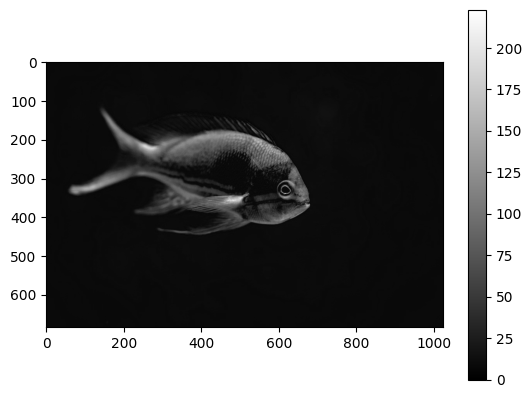

In [9]:
img_green = img_rgb[:,:,1]
plt.imshow(img_green, cmap='gray')
plt.colorbar()
print(f"Visualization limits: {plt.gci().get_clim()}")
plt.show()

Los límites se pueden modificar, tal y como se muestra a continuación.

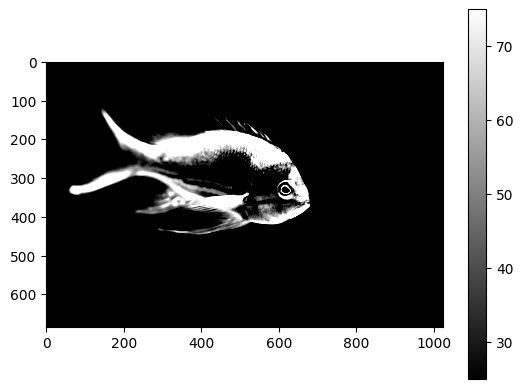

In [10]:
img_green = img_rgb[:,:,1]
plt.imshow(img_green, cmap='gray', vmin=25, vmax=75)#MODIFICAR INTERVALO
plt.colorbar()
plt.show()

En casos de ajuste de contraste, es bueno observar el histograma para determinar donde se encuentra los valores de intensidad de los píxeles.

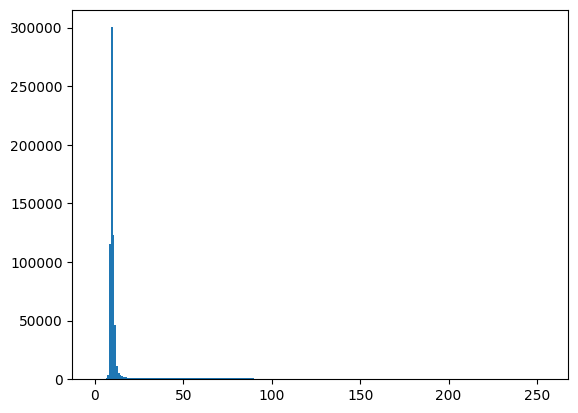

In [11]:
plt.hist(img_green.ravel(), bins=range(256))#255+1
plt.show()

Además, en el caso de imágenes en escala de grises también se puede configurar el mapa de color.

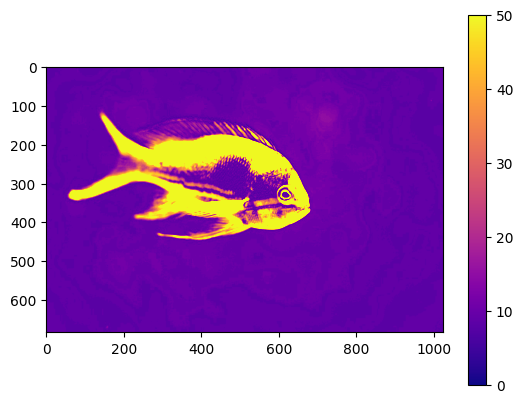

In [12]:
plt.imshow(img_green, clim=(0, 50), cmap="plasma")
plt.colorbar()
plt.show()

El parámetro `interpolation` en la función `imshow` de Matplotlib se utiliza para especificar el método que se debe utilizar para interpolar valores entre los píxeles de una imagen cuando se muestra en un gráfico. La interpolación es importante cuando se escala una imagen a un tamaño diferente al original, ya que determina cómo se calculan y muestran los valores de los píxeles intermedios.

Como se puede observar, puede tener un efecto importante en cómo se muestra una imagen.

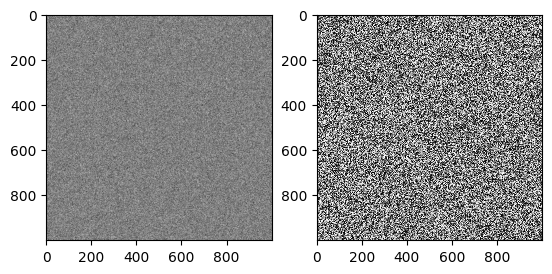

In [13]:
size = 1000
img_rng = np.random.randint(0, 256, (size, size), dtype=np.uint8)
plt.subplot(1,2,1)
plt.imshow(img_rng, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_rng, cmap='gray', interpolation="none")
plt.show()

Otra de las biblioteca importante que se utilizará a lo largo de la asignatura es [scikit-image](https://scikit-image.org/). Scikit-image, comúnmente conocida como "skimage", es una biblioteca de Python que forma parte del proyecto SciPy y se utiliza para el procesamiento de imágenes. Esta biblioteca ofrece una amplia gama de herramientas y funciones para realizar diversas tareas relacionadas con el procesamiento de imágenes, desde la carga y manipulación de imágenes hasta el análisis y la mejora de imágenes. 

Type: <class 'numpy.ndarray'>
Shape: (684, 1024, 3)
Dim: 3
Rows: 684
Columns: 1024
Colors: 1024
DataType: uint8


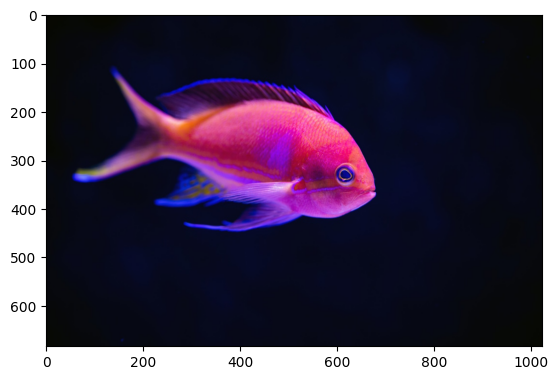

In [66]:
img = skimage.io.imread('pez.jpg') #CARGAR Y PASASR A RGB A LA VEZ
print(f"Type: {type(img)}")
print(f"Shape: {img.shape}")
print(f"Dim: {img.ndim}")
num_rows, num_cols, num_colors = img.shape
print(f"Rows: {num_rows}")
print(f"Columns: {num_cols}")
print(f"Colors: {num_cols}")
print(f"DataType: {img.dtype}")
plt.imshow(img)
plt.show()

OPENCV lo carga en BRG, y SkiImage lo carga directamente en RGB

En este caso la imagen se carga en formato RGB, lista para la visualización.

# Indexado

## Imagen en escala de gris

En la indexación de NumPy, la primera dimensión (img.shape[0]) corresponde a las filas, mientras que la segunda (img.shape[1]) corresponde a las columnas, con el origen (img[0, 0]) en la esquina superior izquierda. Esto coincide con la notación de álgebra matricial/lineal, pero es contrario a las coordenadas cartesianas (x, y).



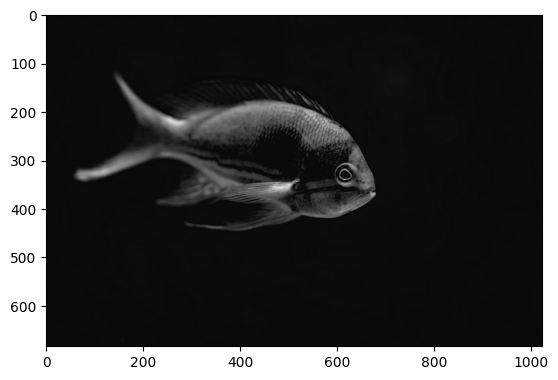

In [67]:
img_green = img[:,:,1].copy()
plt.imshow(img_green, cmap='gray')
plt.show()

8
255
128


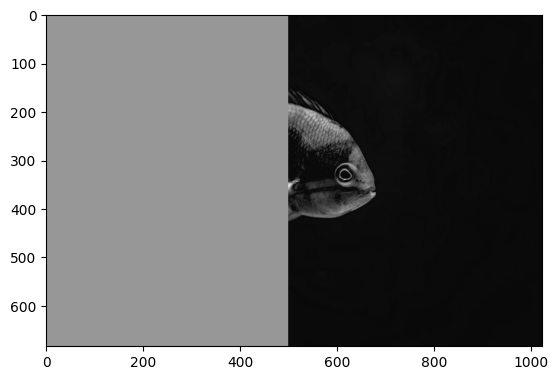

In [68]:
print(img_green[0, 0])

img_green[0, 0] = 255

print(img_green[0, 0])

img_green[:, 0:500] = 128

print(img_green[0, 0])

plt.imshow(img_green, cmap='gray')
plt.show()

El indexado también se puede realizar con una máscara de booleanos

255


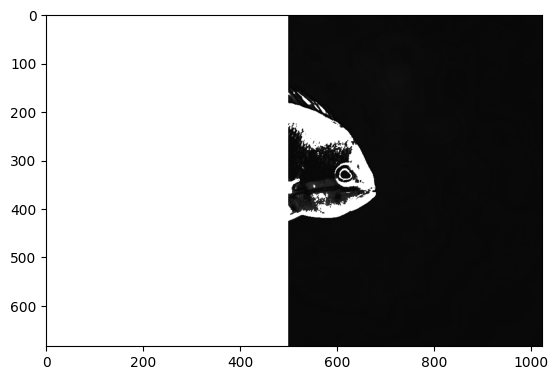

In [69]:
mask = img_green > 50
img_green[mask] = 255
plt.imshow(img_green, cmap='gray')
print(img_green[0, 0])
plt.show()

## Imagen en color

Todo lo anterior es similar para imágenes en color




In [70]:
img[0, 0]

array([7, 8, 2], dtype=uint8)

In [71]:
img[50, 60] = 0

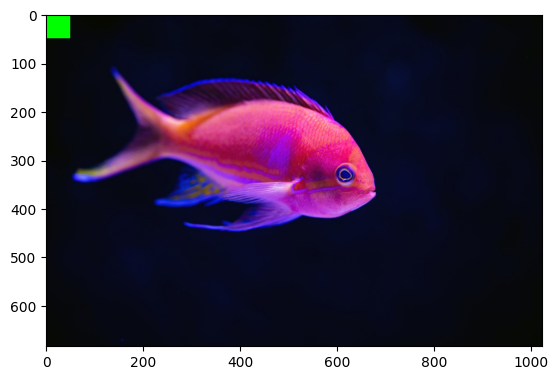

In [72]:
img[0:50, 0:50] = [0, 255, 0]
plt.imshow(img)

## Ejercicio

> Crea y visualiza una imagen similar a la siguiente. Es posible que pueda necesitar utilizar la función `np.concatenate((result, img), axis=1)`

![](http://www.atc.uniovi.es/grado/3va/prac/colors.png)

> Visualiza los canales de color de forma independiente
>
> Crea un línea horizontal en el centro de la imagen de color blanco.
>
> Convierte la imagen a escala de grises promediando los colores

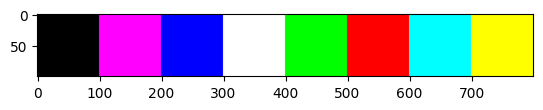

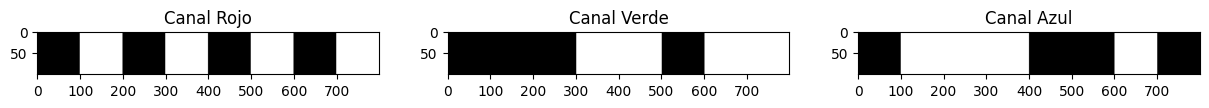

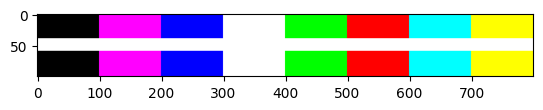

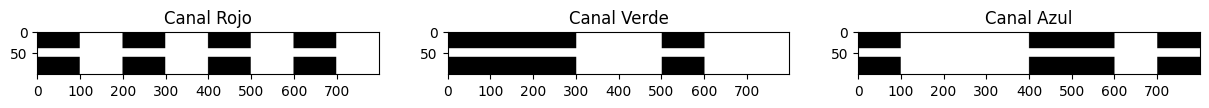

In [21]:
import numpy as np

imagen = np.ones((100, 800, 3),dtype=np.uint8)
# imagen[:,:,0]=255
# imagen[:,:,1]=255 
# imagen
# imagen[:,:]=[255,0,0]
rojo = [255, 0, 0]  # RGB para el color rojo
verde = [0, 255, 0]  # RGB para el color verde
negro = [0, 0, 0]
rosa = [255, 0, 255]  # RGB para el color rosa
azul = [0, 0, 255]
blanco = [255, 255, 255]
verde = [0, 255, 0]
rojo = [255, 0, 0]
turquesa = [0, 255, 255]  # RGB para el color turquesa
amarillo = [255, 255, 0]
imagen[:, :100, :] = negro        # Cuadrado negro al principio
imagen[:, 100:200, :] = rosa       # Cuadrado rosa
imagen[:, 200:300, :] = azul      # Cuadrado azul
imagen[:, 300:400, :] = blanco    # Cuadrado blanco en el centro
imagen[:, 400:500, :] = verde     # Cuadrado verde
imagen[:, 500:600, :] = rojo      # Cuadrado rojo
imagen[:, 600:700, :] = turquesa  # Cuadrado turquesa
imagen[:, 700:800, :] = amarillo  # Cuadrado amarillo al final

# Mostrar la imagen
plt.imshow(imagen)


#Visualizar cada uno por separado
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Canal Rojo
ax[0].imshow(imagen[:, :, 0], cmap='gray')
ax[0].set_title('Canal Rojo')

# Canal Verde
ax[1].imshow(imagen[:, :, 1], cmap='gray')
ax[1].set_title('Canal Verde')

# Canal Azul
ax[2].imshow(imagen[:, :, 2], cmap='gray')
ax[2].set_title('Canal Azul')
plt.show()
centro=imagen.shape[0]//2
imagen[centro-10:centro+10,:]=[255,255,255]
plt.imshow(imagen)

#Visualizar cada uno por separado
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Canal Rojo
ax[0].imshow(imagen[:, :, 0], cmap='gray')
ax[0].set_title('Canal Rojo')

# Canal Verde
ax[1].imshow(imagen[:, :, 1], cmap='gray')
ax[1].set_title('Canal Verde')

# Canal Azul
ax[2].imshow(imagen[:, :, 2], cmap='gray')
ax[2].set_title('Canal Azul')
plt.show()

# Tipos de datos

> Analiza el código que aparece a continuación y piensa en el resultado de la ejecución.

255


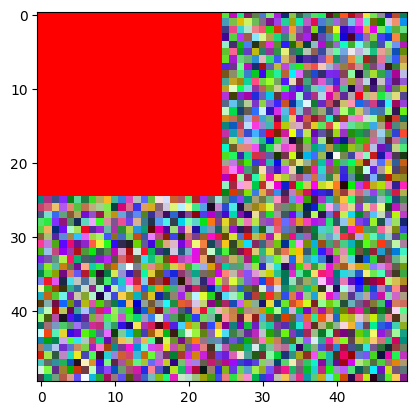

255


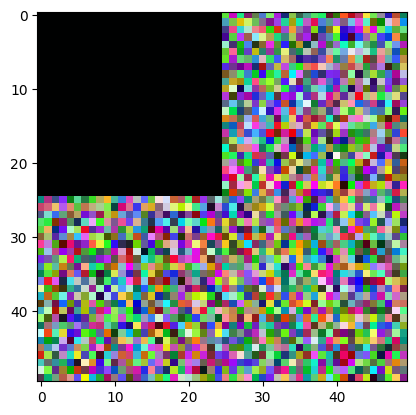

uint8
[ 0 , 255 ]


In [74]:
img = np.random.randint(0, 256, (50, 50, 3), dtype="uint8")
print(np.max(img))

img[0:img.shape[1]//2, 0:img.shape[0]//2] = [255, 0, 0]

plt.imshow(img)
plt.show()

img = img + 1
print(np.max(img))

plt.imshow(img)
plt.show()


print(img.dtype)
print("[",np.min(img),",",np.max(img),"]")



> ¿Eres capaz de explicar el resultado?
>
> Determina el tipo de datos utilizado para almacenar cada píxel y su rango de representación.

Los tipos de datos y los rangos de representación siempre son cuestiones que se deben tener en cuenta. Para evitar la pérdida de precisión en operaciones intermedias es habitual convertir la imagen a otro tipo de dato (`img.astype(np.float64)`). Después de realizar las operaciones se vuele a convertir a tipo de dato original.

Ciertas bibliotecas solo admiten imágenes en formato `uint8`. Otras como skimage admiten también imágenes representadas como números reales, donde la intensidad se representa en el rango [0, 1].

# Ejercicio sobre máscaras

Una máscara no es más que una imagen binaria (cada píxel se representa como un valor booleano) donde se diferencia un elemento de interés (blanco) del fondo (negro)

Para evaluar el trabajo con imágenes se propone un ejercicio con máscaras:

> Descarga y lee una imagen en color.
>
> Crea una máscara con el mismo tamaño, canales y tipo de dato que la imagen. Inicialmente la máscara se inicializa con ceros.
>
> Escribe sobre la máscara tu nombre usando la función `cv2.putText` en blanco. El nombre debe estar centrado respecto a la imagen, para lo que se necesitará utilizar `cv2.getTextSize`.
>
> Modifica la imagen original, poniendo a color negro todos aquellos píxeles donde la máscara tuviera cero.

In [23]:
!curl www.atc.uniovi.es/grado/3va/prac/eye.png --output eye.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  5  781k    5 46486    0     0   399k      0  0:00:01 --:--:--  0:00:01  405k
100  781k  100  781k    0     0  2637k      0 --:--:-- --:--:-- --:--:-- 2648k


In [77]:
img = cv2.imread('eye.jpg')
print(f"Type: {type(img)}")
print(f"Shape: {img.shape}")
print(f"Dim: {img.ndim}")
num_rows, num_cols, num_colors = img.shape
print(f"Rows: {num_rows}")
print(f"Columns: {num_cols}")
print(f"Colors: {num_cols}")
print(f"DataType: {img.dtype}")

Type: <class 'numpy.ndarray'>
Shape: (540, 960, 3)
Dim: 3
Rows: 540
Columns: 960
Colors: 960
DataType: uint8


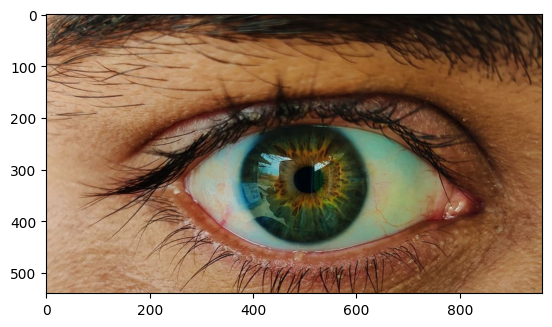

In [78]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#PASAR A RGB CON Cv2
plt.imshow(img_rgb)
plt.show()


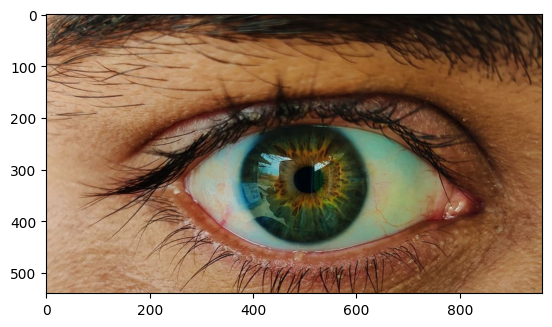

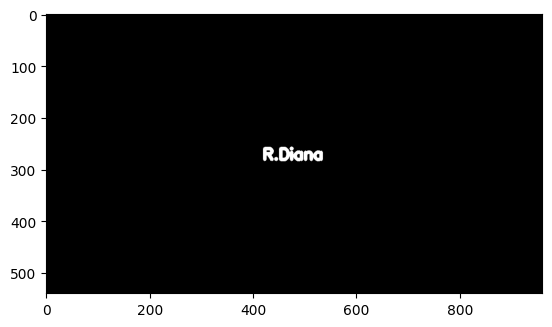

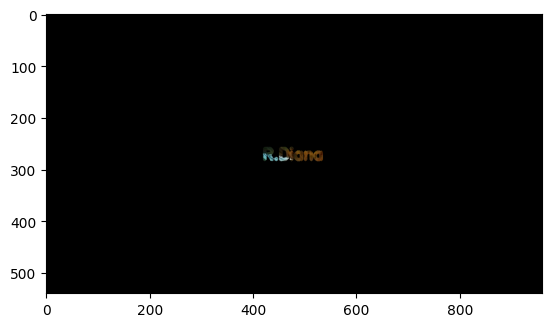

In [81]:
import cv2
import numpy as np


# Crear una máscara con el mismo tamaño y tipo de dato que la imagen, inicializada con ceros
mask = np.zeros_like(img, dtype=np.uint8)

# Configurar el nombre y la fuente para la máscara
name = "R.Diana"
font = cv2.FONT_HERSHEY_SIMPLEX  #Representa el tipo de fuente que se utilizará para el texto
font_scale = 1  # Es el factor de escala para el tamaño de la fuente.
font_thickness = 5  #grosor del texto

# Obtener el tamaño del texto para centrarlo
text_size, _ = cv2.getTextSize(name, font, font_scale, font_thickness)
x = (mask.shape[1] - text_size[0]) // 2
y = (mask.shape[0] + text_size[1]) // 2
#text_size[0]: Es el ancho del texto.
#text_size[1]: Es el alto del texto.
#mask.shape[0]: Es la altura de la imagen (número de filas).
#mask.shape[1]: Es el ancho de la imagen (número de columnas).

# Escribir el nombre blanco sobre la máscara
cv2.putText(mask, name, (x, y), font, font_scale, (255, 255, 255), font_thickness)

# Modificar la imagen original, poniendo a color negro donde la máscara tiene cero
result = np.where(mask == 255, img_rgb, 0)


plt.imshow(img_rgb)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(result)
plt.show()


# Formatos

Una imagen se puede guardar en diversos formatos. Los más comunes son PNG y JPG. 

> Descarga una imagen y guárdala en PNG y JPG. El JPG es un formato de que utiliza compresión con pérdida, por lo que será necesario indicar la calidad.
>
> Reduce progresivamente la calidad y observa cómo afecta al tamaño del archivo y a la calidad de la imagen resultante.
>
> Realiza un gráfico donde se muestre la relación entre el tamaño y la calidad.

Una figura nunca se debe guardar usando los formatos anteriores, ya que perderá calidad. Siempre se debe utilizar algún formato vectorial, PDF o SVG.

> Exporta la figura en formato PDF y PNG. Visualiza el resultado y amplia la figura para observar las diferencias.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  781k  100  781k    0     0  3269k      0 --:--:-- --:--:-- --:--:-- 3310k


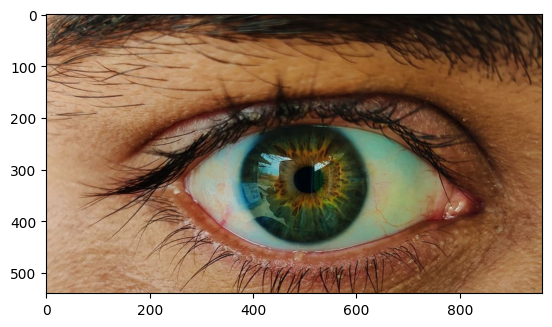

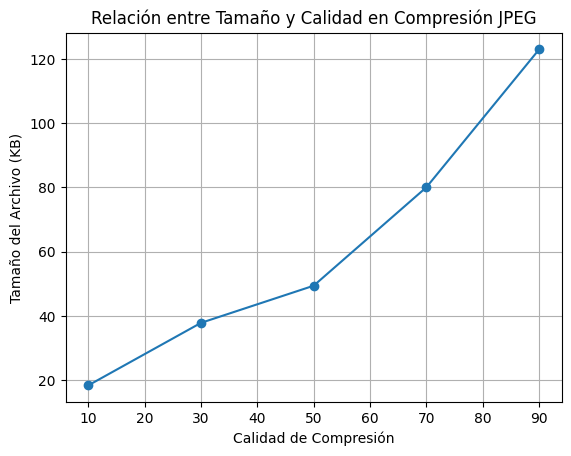

In [88]:
import os
# Descargar la imagen
!curl www.atc.uniovi.es/grado/3va/prac/eye.png --output eye.png
#img1 = skimage.io.imread('eye.png')
img1 = cv2.imread('eye.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()
# Guardar en PNG
#skimage.io.imsave('eye_PNG.png', img1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
cv2.imwrite('eye_PNG.png', img1)

#skimage.io.imsave('eye_PNG.png', img1)#GUARDAR EN PNG

qualities = [10, 30, 50, 70, 90]  # Puedes ajustar estos valores según tus necesidades
file_sizes = []
quality_values = []
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
for quality in qualities:
    # Especificar la calidad JPEG

    # Crear un nombre de archivo único para cada calidad
    filename = f'eye_JPG_Q{quality}.jpg'

    # Guardar la imagen con la calidad especificada
    cv2.imwrite(filename, img1, [cv2.IMWRITE_JPEG_QUALITY, quality])#GUARDAR EN JPG
    # Obtener el tamaño del archivo en kilobytes
    file_size_kb = os.path.getsize(filename) / 1024.0
    
    file_sizes.append(file_size_kb)
    quality_values.append(quality)

# Crear el gráfico
plt.plot(quality_values, file_sizes, marker='o')
plt.title('Relación entre Tamaño y Calidad en Compresión JPEG')
plt.xlabel('Calidad de Compresión')
plt.ylabel('Tamaño del Archivo (KB)')
plt.grid(True)


# Guardar la gráfica
plt.savefig('compression_plot.png')
plt.savefig('compression_plot.pdf')
plt.show()

